With a Gre score of 315, TOEFL score of 105, University Rating of 4, SOP of score 4, 4 LORs, CGPA of 9.5 and having research papers, What are the chances of me getting into my dream University?  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import plotly.graph_objs as go

In [3]:
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics
%matplotlib inline

In [4]:
df1 = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict.csv')
df2 = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [5]:
frames = [df1, df2]

df = pd.concat(frames)

In [6]:
df=df.drop(['Serial No.'], axis = 1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [7]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000,900.000000,900.000000
mean,316.621111,107.288889,3.102222,3.385556,3.47000,8.586433,0.554444,0.722900
std,11.369700,6.073968,1.143048,0.997612,0.91319,0.600822,0.497303,0.141722
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.140000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.570000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.052500,1.000000,0.822500
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.970000


Heat Map

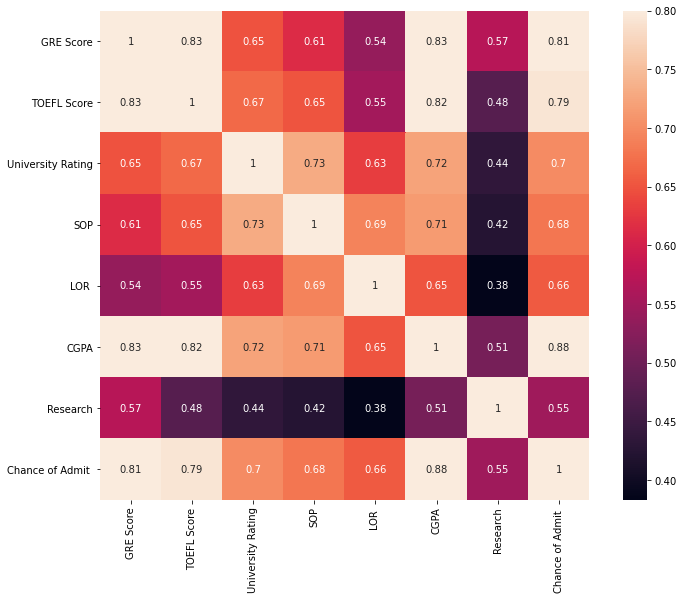

In [8]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

To find all the chances that are above 75%

In [9]:
query1 = df[df['Chance of Admit ']>0.75]
query1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
3,322,110,3,3.5,2.5,8.67,1,0.80
5,330,115,5,4.5,3.0,9.34,1,0.90
11,327,111,4,4.0,4.5,9.00,1,0.84
...,...,...,...,...,...,...,...,...
488,322,112,3,3.0,4.0,8.62,1,0.76
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93


In [10]:
color=['Orange', 'Yellow', 'Green', 'Blue', 'Purple', 'Violet', 'Pink']
cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
cols1 = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

Univariate Analysis on all the Parameters

In [11]:
#univariate analysis
import plotly.express as px
import plotly.offline as pyoff
x=0
for i in cols1:
    #df = px.data.tips()
    fig = px.histogram(df, x=i, nbins=100, opacity=0.8,
                   color_discrete_sequence=[color[x%7]])
    fig.show()
    data = [go.Box(
        x=df[i],
        name = i,
        marker = dict(
            color = color[x%7],
        )
    )]
    pyoff.iplot(data)
    x+=1

BoxPlot of all the Params against 'Chance of Admit'

In [12]:
for i in cols:
    group1=df.groupby([i])['Chance of Admit '].count()
    lis=list(group1.index)
    data=[]
    x=0
    for j in lis:
        trace = go.Box(
            y=df[df[i]==j]['Chance of Admit '],
            name = j,
            marker = dict(
            color = color[x%7],
            )
        )
        x+=1
        data.append(trace)
        layout = dict(title = 'Chance of Admit vs '+i,
              yaxis= dict(title= 'Chance of Admit ',ticklen= 5,zeroline= False),
              xaxis= dict(title= i, ticklen= 5,zeroline= False)
             )
    fig = dict(data = data, layout = layout)
    pyoff.iplot(fig)

Since CGPA has the highest corretation with 'Chance of Admit'
Bivariate Scatter Plots are done along with highlighting other Parameters that could possibly impact 'Chance of Admit'

In [45]:
# import graph objects as "go"
import plotly.graph_objs as go
import plotly.offline as pyoff
# creating trace1
data =go.Scatter(
                    x = df['CGPA'],
                    y = df['Chance of Admit '],
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = df['GRE Score'], showscale = True),
                    text = df['GRE Score']
                    )



layout = dict(title = 'GRE is Highlighted',
              yaxis= dict(title= 'Chance of Admit ',ticklen= 5,zeroline= False),
              xaxis= dict(title= 'CGPA',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
pyoff.iplot(fig)

In [46]:
# import graph objects as "go"
import plotly.graph_objs as go
import plotly.offline as pyoff
# creating trace1
data =go.Scatter(
                    x = df['CGPA'],
                    y = df['Chance of Admit '],
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = df['SOP'], showscale = True),
                    text = df['SOP']
                    )



layout = dict(title = 'With SOP',
              yaxis= dict(title= 'Chance of Admit ',ticklen= 5,zeroline= False),
              xaxis= dict(title= 'CGPA',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
pyoff.iplot(fig)

In [47]:
# import graph objects as "go"
import plotly.graph_objs as go
import plotly.offline as pyoff
# creating trace1
data =go.Scatter(
                    x = df['CGPA'],
                    y = df['Chance of Admit '],
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = df['University Rating'], showscale = True),
                    text = df['University Rating']
                    )



layout = dict(title = 'With University Rating',
              yaxis= dict(title= 'Chance of Admit ',ticklen= 5,zeroline= False),
              xaxis= dict(title= 'CGPA',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
pyoff.iplot(fig)

In [48]:
# import graph objects as "go"
import plotly.graph_objs as go
import plotly.offline as pyoff
# creating trace1
data =go.Scatter(
                    x = df['CGPA'],
                    y = df['Chance of Admit '],
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = df['Research'], showscale = True),
                    text = df['Research']
                    )



layout = dict(title = 'With Research',
              yaxis= dict(title= 'Chance of Admit ',ticklen= 5,zeroline= False),
              xaxis= dict(title= 'CGPA',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
pyoff.iplot(fig)

Bivariate Scatter Plots against 'Chances of Admit'

In [17]:
x=0
for i in cols:
    plot_data = [
        go.Scatter(
            x=df[i],
            y=df['Chance of Admit '],
            mode = "markers",
            name=i,
            marker = dict(color = color[x])

            ),
        go.Scatter(
            x=query1[i],
            y=query1['Chance of Admit '],
            mode = "markers",
            name='> 75% Chance',
            marker = dict(color = 'Red')

            ),

    ]
    plot_layout = go.Layout(
            #title=i,
            yaxis_title='Chance of Admit ',
            xaxis_title=i
        )
    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)
    x+=1

Predictive Modeling

In [18]:
X = df.drop(['Chance of Admit '], axis=1).values
y = df['Chance of Admit '].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
model_ = []

Using Regression Algorithms

In [33]:
lr = LinearRegression()  
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Root Mean Squared Error for LinearRegression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
model_.append(['LinearRegression', np.sqrt(metrics.mean_squared_error(y_test, y_pred))])
lasso = Lasso()  
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print('Root Mean Squared Error for lasso:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
model_.append(['Lasso', np.sqrt(metrics.mean_squared_error(y_test, y_pred))])
ridge = Ridge()  
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('Root Mean Squared Error for ridge:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
model_.append(['Ridge', np.sqrt(metrics.mean_squared_error(y_test, y_pred))])
en = ElasticNet()  
en.fit(X_train, y_train)
y_pred = en.predict(X_test)
print('Root Mean Squared Error for ElasticNet:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
model_.append(['ElasticNet', np.sqrt(metrics.mean_squared_error(y_test, y_pred))])
knn = KNeighborsRegressor()  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Root Mean Squared Error for knn:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
model_.append(['knn', np.sqrt(metrics.mean_squared_error(y_test, y_pred))])
dt = DecisionTreeRegressor()  
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Root Mean Squared Error for DecisionTree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
model_.append(['DecisionTree', np.sqrt(metrics.mean_squared_error(y_test, y_pred))])
svm = SVR()  
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Root Mean Squared Error for svm:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
model_.append(['svm', np.sqrt(metrics.mean_squared_error(y_test, y_pred))])
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)   
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Root Mean Squared Error for RandomForest:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
model_.append(['RandomForest', np.sqrt(metrics.mean_squared_error(y_test, y_pred))])

Root Mean Squared Error for LinearRegression: 0.06604417749266839
Root Mean Squared Error for lasso: 0.12744426248017154
Root Mean Squared Error for ridge: 0.06609674091506972
Root Mean Squared Error for ElasticNet: 0.10031946396412199
Root Mean Squared Error for knn: 0.06616696053671098
Root Mean Squared Error for DecisionTree: 0.049749371855331
Root Mean Squared Error for svm: 0.0828832070793794
Root Mean Squared Error for RandomForest: 0.03973424915051947


RandomForest showed the least RMSE value (0.0397)

In [34]:
models = pd.DataFrame(model_,columns=['Model', 'RMSE'])

In [35]:
models=models.sort_values(by=['RMSE'])

In [36]:
models=models.reset_index()

In [37]:
models

,index,Model,RMSE
0,7,RandomForest,0.039734
1,5,DecisionTree,0.049749
2,0,LinearRegression,0.066044
3,2,Ridge,0.066097
4,4,knn,0.066167
5,6,svm,0.082883
6,3,ElasticNet,0.100319
7,1,Lasso,0.127444


To Compare all the rmse values for each model.

In [38]:
import plotly.express as px
fig = px.bar(models, x="Model", y="RMSE", color='Model')
fig.show()

Predicting My chance accoring to my Credentials.

In [39]:
my_chance1=[315, 105, 4, 4, 4, 9.5, 1]

In [40]:
creds=np.array(my_chance1)

In [41]:
my_chance=creds.reshape(-1, 7)

In [43]:
My_prediced_chance = rf.predict(my_chance)

In [44]:
My_prediced_chance

array([0.8932])

Perhaps, My chance could be 89.3% to get into my dream University. 